
# <p style='text-align: center;'> Zero Shot Learning - Predicción de imágenes </p>

#### <p style='text-align: justify;'> Authors </p>
<p style='text-align: justify;'> - William Guadalupe Quispe</p>
<p style='text-align: justify;'> - Víctor Chavez Bruno</p>

El código que se desarrollará utilizará el dataset AwA2(Animals with Attributes 2), que comprende imagenes de distintos clase de animales los cuales tienen atributos definidos por cada imagen, el dataset fue extraido de https://cvml.ist.ac.at/AwA2/?ref=https://githubhelp.com 


In [78]:
import pandas as pd
df = pd.read_csv(
    'Animals_with_Attributes2/classes.txt', sep="\t",header=None)
df=df.drop([0], axis=1)

df=df.rename(columns={1:'clase'})

print("Cantidad de clases de animales en el dataset: ",len(df))
df

Cantidad de clases de animales en el dataset:  50


,clase
0,antelope
1,grizzly+bear
2,killer+whale
3,beaver
4,dalmatian
5,persian+cat
6,horse
7,german+shepherd
8,blue+whale
9,siamese+cat


# Atributos

In [2]:
#Caracteristicas de cada clase
df_atributes = pd.read_csv(
    'Animals_with_Attributes2/predicates.txt', sep="\t",header=None)
df_atributes=df_atributes.drop([0], axis=1)
print("Cantidad de atributos por cada clase: ",len(df_atributes))
print(df_atributes)

Cantidad de atributos por cada clase:  85
           1
0      black
1      white
2       blue
3      brown
4       gray
..       ...
80     smart
81     group
82  solitary
83  nestspot
84  domestic

[85 rows x 1 columns]


# Matriz clase animal-atributos

Matriz de clases de animales vs atributos


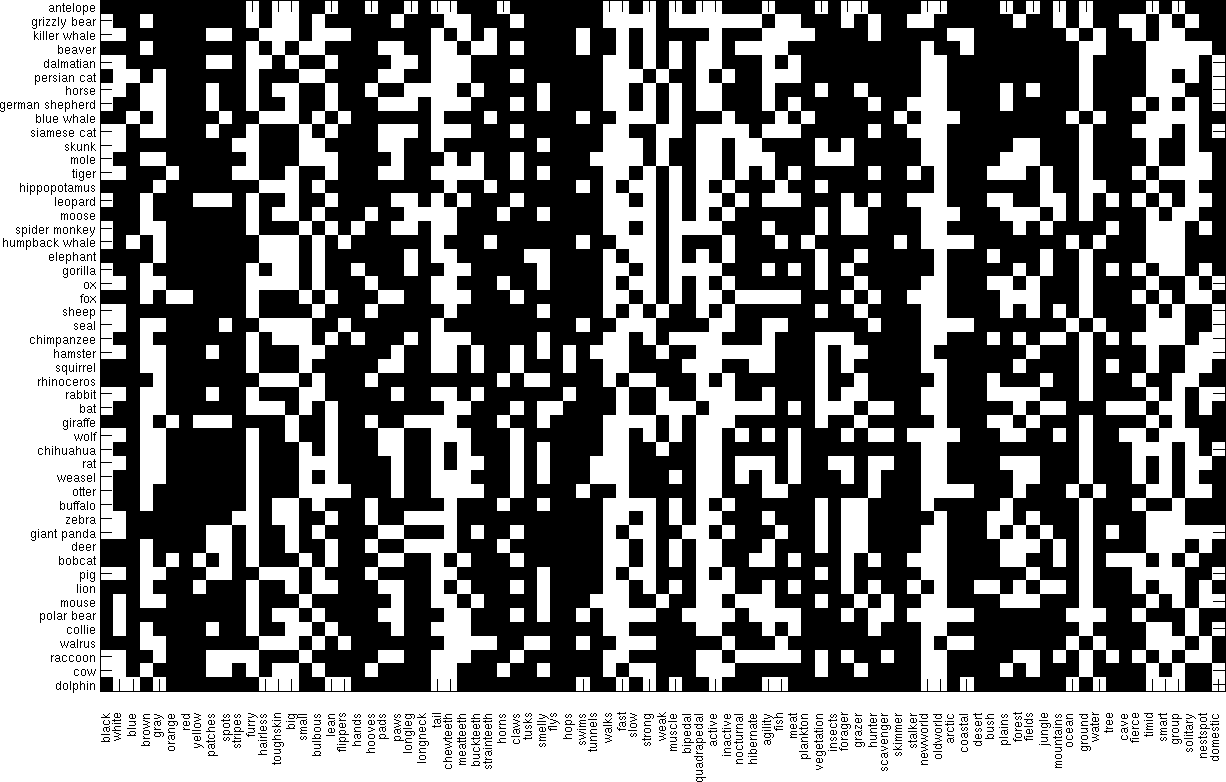

In [3]:
print("Matriz de clases de animales vs atributos")
from IPython.display import Image
Image("Animals_with_Attributes2/predicate-matrix.png")

#![title](Animals_with_Attributes2/predicate-matrix.png)

In [30]:
#Expresion en forma binaria
print("Matriz en forma binaria:")
print("'0' representado por un cuadro negro")
print("'1' representado por un cuadro blanco")

df_binary = pd.read_csv(
    'Animals_with_Attributes2/predicate-matrix-binary.txt', sep=" ",header=None)
print(df_binary)

Matriz en forma binaria:
'0' representado por un cuadro negro
'1' representado por un cuadro blanco
    0   1   2   3   4   5   6   7   8   9   ...  75  76  77  78  79  80  81  \
0    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   0   1   
1    1   0   0   1   0   0   0   0   0   0  ...   0   0   1   1   0   1   0   
2    1   1   0   0   0   0   0   0   1   1  ...   1   0   0   1   0   1   1   
3    0   0   0   1   0   0   0   0   0   0  ...   1   0   0   0   1   1   1   
4    1   1   0   0   0   0   0   0   1   1  ...   0   0   0   0   1   1   1   
5    0   1   1   0   1   0   0   0   0   0  ...   0   0   0   0   1   1   0   
6    1   1   0   1   1   0   0   0   1   0  ...   0   0   0   0   1   1   1   
7    1   0   0   1   1   0   0   0   1   0  ...   0   0   0   1   0   1   0   
8    0   0   1   0   1   0   0   0   0   1  ...   1   0   0   0   1   1   1   
9    1   1   0   1   1   0   0   0   1   0  ...   0   0   0   1   1   1   0   
10   1   1   0   0   0   0   0 

# ClassTraining - Class Zero Shot Learning

In [32]:
import pandas as pd
#clases Zero Shot Learning
df_zhl = pd.read_csv(
    'Animals_with_Attributes2/testclasses.txt',header=None)

print("Cantidad de clases de Zero Shot Learning: ",len(df_zhl))
print(df_zhl)

print('\n')

#clases de entrenamiento
df_train = pd.read_csv(
    'Animals_with_Attributes2/trainclasses.txt',header=None)
print("Cantidad de clases de entrenamiento: ",len(df_train))
print(df_train)

Cantidad de clases de Zero Shot Learning:  10
                0
0      chimpanzee
1     giant+panda
2         leopard
3     persian+cat
4             pig
5    hippopotamus
6  humpback+whale
7         raccoon
8             rat
9            seal


Cantidad de clases de entrenamiento:  40
                  0
0          antelope
1      grizzly+bear
2      killer+whale
3            beaver
4         dalmatian
5             horse
6   german+shepherd
7        blue+whale
8       siamese+cat
9             skunk
10             mole
11            tiger
12            moose
13    spider+monkey
14         elephant
15          gorilla
16               ox
17              fox
18            sheep
19          hamster
20         squirrel
21       rhinoceros
22           rabbit
23              bat
24          giraffe
25             wolf
26        chihuahua
27           weasel
28            otter
29          buffalo
30            zebra
31             deer
32           bobcat
33             lion
34           

# Ordenamos el dataset de clases-atributos

In [120]:
#concatenando las clases y atributos
datatotal=pd.concat([df,df_binary],axis=1)
datatotal.head()

,clase,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,antelope,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,grizzly+bear,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
2,killer+whale,1,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
3,beaver,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
4,dalmatian,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,1


In [127]:
#Extraemos la informacion correspondiente a las clases ZHL
datazhl=pd.concat([datatotal.loc[df['clase']=='chimpanzee'],datatotal.loc[df['clase']=='giant+panda'],datatotal.loc[df['clase']=='leopard'],datatotal.loc[df['clase']=='persian+cat'],datatotal.loc[df['clase']=='pig'],datatotal.loc[df['clase']=='hippopotamus'],datatotal.loc[df['clase']=='humpback+whale'],datatotal.loc[df['clase']=='raccoon'],datatotal.loc[df['clase']=='rat'],datatotal.loc[df['clase']=='seal']])

#Ordenamos la clase alfabeticamente
datazhl=datazhl.sort_values(by = ["clase"])

#reiniciamos el index
datazhl=datazhl.reset_index()

#eliminamos la columna index
datazhl=datazhl.drop(['index'], axis=1)

print("Data ZHL concatenada y ordenada.")
datazhl

Data ZHL concatenada y ordenada.


,clase,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,chimpanzee,1,0,0,1,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,1
1,giant+panda,1,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,1,1
2,hippopotamus,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,humpback+whale,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
4,leopard,1,0,0,1,0,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
5,persian+cat,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
6,pig,1,1,0,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,1
7,raccoon,1,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0
8,rat,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
9,seal,1,1,0,1,1,0,0,0,0,...,1,0,0,0,1,1,1,0,0,1


In [128]:
#Extraemos la informacion correspondiente a la clase Training
#Eliminaremos las que corresponden a ZHL
datatraining=datatotal.drop(datatotal.index[[24,38,14,5,41,13,17,47,33,23]])

#Ordenamos la clase alfabeticamente
datatraining=datatraining.sort_values(by = ["clase"])

#reiniciamos el index
datatraining=datatraining.reset_index()

#eliminamos la columna index
datatraining=datatraining.drop(['index'], axis=1)

print("Data Training concatenada y ordenada.")
datatraining

Data Training concatenada y ordenada.


,clase,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,antelope,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,bat,1,0,0,1,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
2,beaver,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
3,blue+whale,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,1,1,1,0,0
4,bobcat,0,0,0,1,0,1,0,1,0,...,0,1,1,1,0,1,0,1,0,0
5,buffalo,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,chihuahua,1,0,0,1,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,1
7,collie,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,1
8,cow,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
9,dalmatian,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,1


# Preprocesamiento de imágenes

In [6]:
import argparse
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import copy
import torch
import torch.nn as nn
import torchvision
from torch.utils import data
import torchvision.transforms as transforms
from torchvision import datasets, models
import os
import sys

In [7]:
#Preprocesamiento de las imagenes zero shot learning y  entrenamiento

train_dataset = datasets.ImageFolder('Animals_with_Attributes2/JPEGImages/train',
                              transform=transforms.Compose([
                                  #transforms.RandomResizedCrop(224),
                                  transforms.Resize(255),#dimensionamiento de la imagen
                                  transforms.CenterCrop(224),#corte de 224x224 porque usaremos resnet18
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])
                                  ]))

test_dataset = datasets.ImageFolder('Animals_with_Attributes2/JPEGImages/test',
                              transform=transforms.Compose([
                                  #transforms.RandomResizedCrop(224),
                                  transforms.Resize(255),#dimensionamiento de la imagen
                                  transforms.CenterCrop(224),#corte de 224x224  porque usaremos resnet18
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])
                                  ]))


In [8]:
class_names_train = train_dataset.classes
print(class_names_train)
class_names_test = test_dataset.classes
print(class_names_test)

['antelope', 'bat', 'beaver', 'blue+whale', 'bobcat', 'buffalo', 'chihuahua', 'collie', 'cow', 'dalmatian', 'deer', 'dolphin', 'elephant', 'fox', 'german+shepherd', 'giraffe', 'gorilla', 'grizzly+bear', 'hamster', 'horse', 'killer+whale', 'lion', 'mole', 'moose', 'mouse', 'otter', 'ox', 'polar+bear', 'rabbit', 'rhinoceros', 'sheep', 'siamese+cat', 'skunk', 'spider+monkey', 'squirrel', 'tiger', 'walrus', 'weasel', 'wolf', 'zebra']
['chimpanzee', 'giant+panda', 'hippopotamus', 'humpback+whale', 'leopard', 'persian+cat', 'pig', 'raccoon', 'rat', 'seal']


In [9]:
# Particionamos los subconjuntos en minibatches
train_dataloader = torch.utils.data.DataLoader(train_dataset, train=True, batch_size=4, shuffle=True)#4 imagenes cada imagen, TRue random cada minibatch 
ZSL_dataloader = torch.utils.data.DataLoader(test_dataset, train=False, batch_size=4, shuffle=True)

In [10]:
#Escogemo el dispositivo cpu o gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definición del modelo - Feature extraction

Eliminaremos la ultima capa(FC) del modelo resnet para obtener la salida como vector de caracteristicas.

Esta la obtenemos aplicando una función lambda.

In [11]:
#Importamos un modelo previamente entrenado
ft_model = models.resnet18(pretrained=True)

#Mantenemos fijo la parte convolucional,no se alteran los filtros(fijamos el required_grad en False)
for param in ft_model.parameters():
    param.requires_grad = False

#Elimnamos la última capa fully conected (FC)
del ft_model.fc

#Obtenemos la salida como vector de caractisticas
ft_model.fc=lambda x:x

#Visualizacion del modelo de caracteristicas(ft_model), notaremos que no cuenta con la capa fully conected
ft_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Visualizacion interna del modelo

Otra forma de ver la composicion es cargar el modelo en la web de netron.app, para ello exportaremos el modelo en el formato adecuado 

In [139]:
testiter = iter(train_dataloader)
images,labels = testiter.next() 

input_names = ['Sentence']
output_names = ['preds']

#Exportemos el modelo en el formato onnx
torch.onnx.export(ft_model, images, 'ft_model_hiddenlayer.onnx', input_names=input_names, output_names=output_names)

Modelo Ft_model


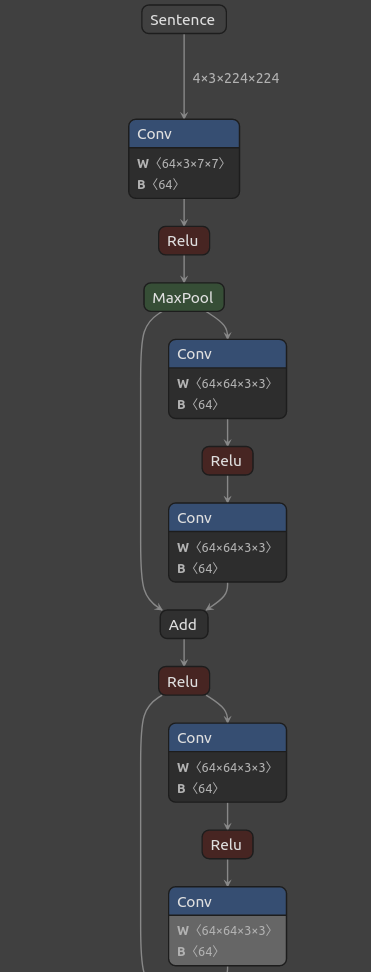

In [101]:
#Se muestra el modelo en netron.app
from IPython.display import Image
print("Modelo Ft_model")
Image("part1.png")

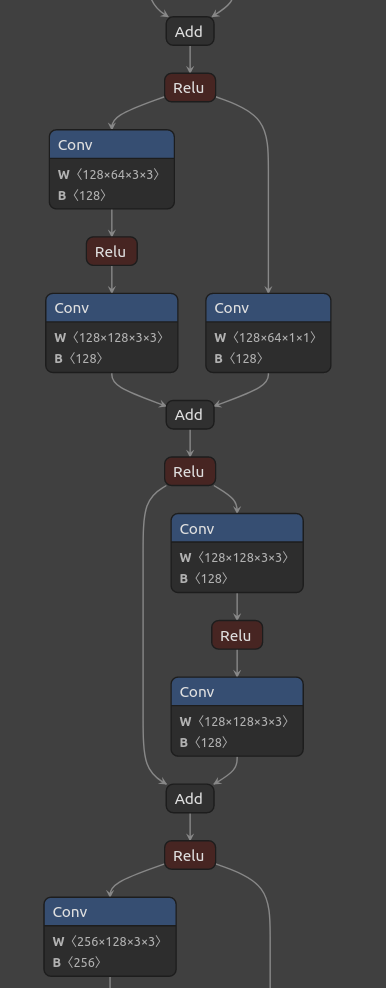

In [102]:
Image("part2.png")

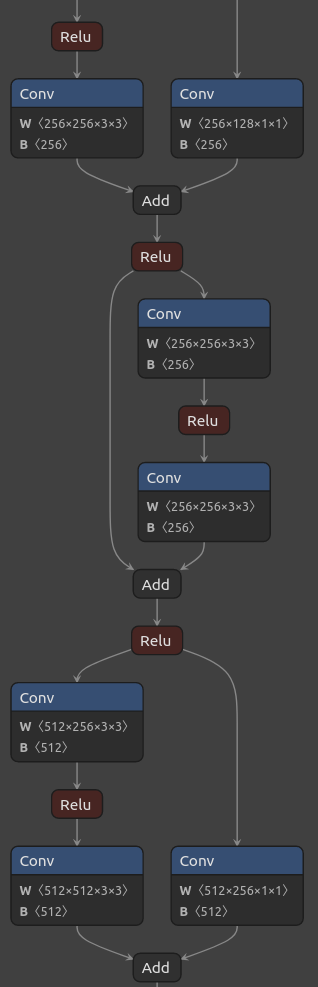

In [103]:
Image("part3.png")

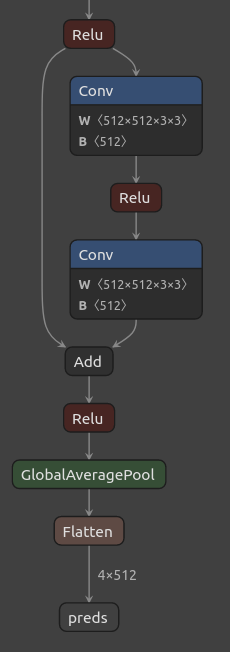

In [104]:
Image("part4.png")

In [29]:
#Dimensión de un minibatch de imágenes (4 imagenes,3 rgb, dimension 224x224)
images.shape

torch.Size([4, 3, 224, 224])

In [22]:
#Dimension de la primera imagen
images[0].shape

torch.Size([3, 224, 224])

In [140]:
#Caracteristicas de la imagen cero
ft_model(images)[0]

tensor([4.0143e-01, 1.0115e+00, 6.4178e-01, 8.1922e-02, 1.2676e+00, 4.4387e+00,
        2.1095e+00, 1.4459e+00, 2.6891e-01, 1.9669e+00, 1.2517e-01, 1.9964e+00,
        6.9972e-01, 2.3235e+00, 3.0720e+00, 6.2166e-01, 1.1782e+00, 1.1041e+00,
        1.7467e+00, 9.8007e-01, 8.0311e-01, 2.3888e+00, 5.9113e-01, 1.5450e+00,
        6.2122e-01, 1.5571e+00, 1.7488e+00, 1.1108e+00, 4.1205e-01, 5.0811e-01,
        5.3746e-01, 1.2651e-01, 1.2011e+00, 3.6587e-02, 1.5248e+00, 1.6594e-01,
        3.9617e-01, 1.5857e-01, 1.0124e-01, 7.1931e-01, 5.9962e-01, 1.4441e+00,
        1.1560e+00, 1.7903e+00, 8.1912e-02, 4.9881e-01, 1.6606e+00, 1.0220e-01,
        7.9963e-01, 1.6147e+00, 8.1394e-01, 3.8227e-01, 6.7940e-01, 4.1911e+00,
        9.7433e-02, 4.4317e+00, 1.6839e+00, 2.0730e+00, 1.6753e+00, 1.3021e+00,
        2.4126e+00, 2.9129e+00, 4.1887e+00, 2.3574e-01, 1.3855e+00, 1.4420e+00,
        3.5398e-01, 2.7577e-01, 2.7694e-01, 3.0018e+00, 7.3983e-03, 1.5339e-01,
        3.8194e-01, 1.0644e+00, 2.4151e-

In [145]:
images,labels = testiter.next()

# Entrenamiento de los vectores de caracteristicas a los vectores semánticos

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [131]:
#Creamos lared fully conected
class NN(nn.Module):
    def __init__(self, input_size, num_classes): #input_size=512
        super(NN,self).__init__()
        self.fc1 = nn.Linear(input_size, 360)
        self.fc2 = nn.Linear(360, 240)
        self.fc3 = nn.Linear(240, 160)
        self.fc4 = nn.Linear(160, num_classes) #num_classes 85
    
    def fordward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [132]:
#Escogemo el dispositivo cpu o gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [133]:
#Hiperparametros

input_size = 512
num_classes = 85
learning_rate = 0.001
batch_size = 1000
num_epochs = 1

In [ ]:
#Cargamos la data


In [ ]:
#Separando la data y el target
X = df.drop(34, axis=1)
y = df[34]

In [ ]:
#Escalamiento de la data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
#Definiendo la clase Dataset
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
    def __len__(self):
        return self.length

trainset = dataset(X,y)

#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [ ]:
#Inicializamos la red
model= NN(input_size=input_size, num_classes=num_classes).to(device)

In [ ]:
#Loss and  optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
# Entrenamiento de la red
losses = []
accur = []

print("Clasificacion binaria sin Regularizacion")

for i in range(num_epochs):
    for j,(x_train,y_train) in enumerate(trainloader):
        
        output = model(x_train)
 
        #forward
        loss = loss_fn(output,y_train.reshape(-1,1))
        predicted = model(torch.tensor(X,dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        
        #backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        #descenso de gradiente estocastica
        optimizer.step()
    
    if i%50 == 0:
        losses.append(loss)
        accur.append(acc)
        print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

# Predicción de dataset de zero shot learning

In [ ]:
#Pasamos imagen de ZHL al modelo para extraccion de caracteristicas
ft_model()

In [ ]:
#entrenamos el vector de caracteristicas

In [ ]:
#evaluamos el vector predicho en el campo semantico,

esto aun no esta claro, comparandolo con el vector real de caracteristicas

# Evaluación de modelo

In [88]:
def get_hamming_dist(clase_actual, clase):
  return np.sum(clase_actual != clase)

def get_cosine_dist(clase_actual, clase):
  return np.sum(clase_actual * clase) / np.sqrt(np.sum(curr_labels)) / np.sqrt(np.sum(clase))

def get_euclidean_dist(clase_actual, clase):
  return np.sqrt(np.sum((clase_actual - clase)**2))
